In [ ]:
#pip install opencv-python

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
samples=[[0,0,0],[255,255,255],[255,250,250],[240,255,255],[255,255,240],[240,255,240],[248,248,255],[255,250,240],
        [0,0,255],[0,0,205],[0,0,139],[0,0,128],[0,191,255],[0,128,0],[0,100,0],[34,139,34],[124,252,0],[50,205,50],
        [255,0,0],[128,0,0],[139,0,0],[165,42,42],[220,20,60],[255,69,0],[255,140,0],[255,165,0],[255,255,0],
        [255,215,0],[75,0,130],[128,0,128],[148,0,211],[238,130,238],[147,112,219],[255,20,147],[255,192,203],
        [255,182,193],[139,69,19],[160,82,45],[78,34,34],[154,205,50],[85,107,47],[107,142,35],[124,252,0],
        [127,255,0],[173,255,47],[0,100,0],[0,128,0],[34,139,34],[0,255,0],[50,205,50],[240,128,128],[233,150,122],
        [250,128,114],[255,160,122],[255,140,0],[255,165,0],[255,69,0],[218,165,32]]

y = ["black","White","White","White","White","White","White","White","blue","blue","blue","blue","blue","green",
     "green","green","green","green","red","red","red","red","red","orange","orange","orange","yellow","yellow",
     "indigo","Purple","violet","violet","purple","pink","pink","pink","brown","brown","brown","green","green",
     "green","green","green","green","green","green","green","green","green","pink","pink","pink","pink" "orange",
     "orange","orange","orange","orange"]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(samples,y)
def get_name(code):
    return(neigh.predict(code))

In [8]:
def get_colors(image, number_of_colors, show_chart):
   
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = get_name(rgb_colors), colors = hex_colors)
        
    return ordered_colors

In [9]:
def plot_detected(image):
    img = cv2.imread(image)
    img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
  
    contours= cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
  
    i = 0
    font = cv2.FONT_HERSHEY_SIMPLEX
    for contour in contours:
  
        if i == 0:
            i = 1
            continue
        
        x,y,w,h = cv2.boundingRect(contour)
        if(w>20 and h>20):
            crop=img[y:y+h,x:x+w]
            clr=get_colors(crop,1,False)
            cv2.rectangle(img, (x, y), (x+w, y+h), (clr[0]), 2)
            cv2.putText(img, get_name(clr)[0], (x, y), font, 0.5,(0,0,0),1,cv2.LINE_AA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

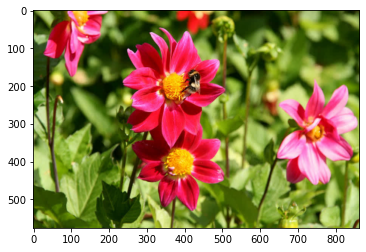

In [10]:
image = cv2.imread('./images/4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[array([168.08699943,  15.47691776,  21.5017395 ]),
 array([195.50016813, 206.14994371, 111.09799851]),
 array([250.95570832, 154.34560693, 206.94726434]),
 array([36.5123697 , 55.06214752,  4.02187813]),
 array([144.73613959, 163.28756621,  57.05391466]),
 array([242.27523101,  50.06669727,  95.4781767 ]),
 array([ 87.60007086, 111.43424845,  19.31402553])]

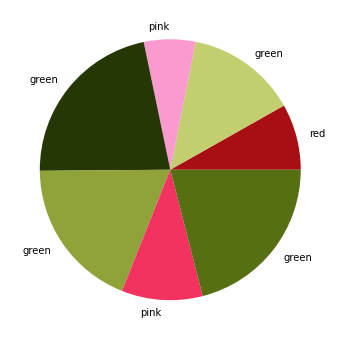

In [11]:
#pie chart
get_colors(get_image('./images/4.jpg'), 7, True)

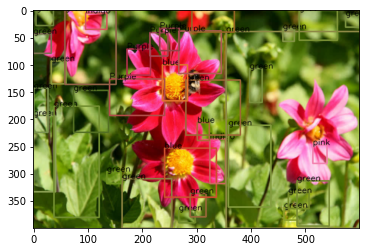

In [12]:
#image
plot_detected('./images/4.jpg')